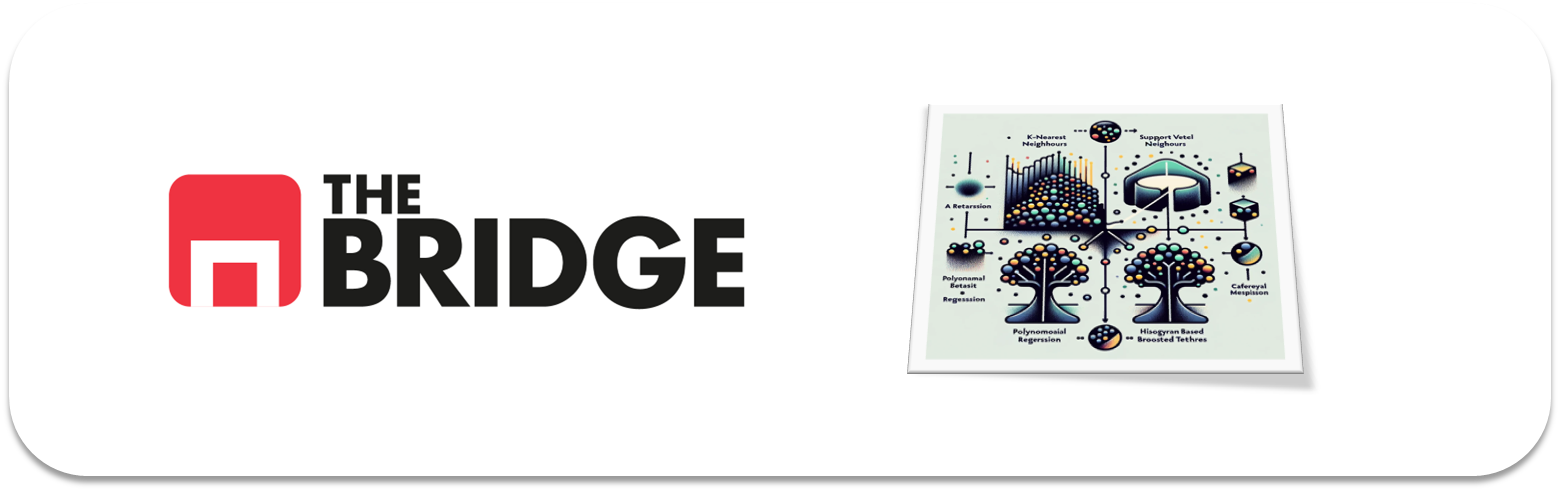

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import bootcampviztools as bvt
import toolbox_ML as tml

np.random.seed(42)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
df = pd.read_csv('./data/credit_npo.csv')
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [3]:
target = 'SeriousDlqin2yrs'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [4]:
tml.tipifica_variables(df, 16, 30)

,nombre_variable,tipo_sugerido
0,SeriousDlqin2yrs,Binaria
1,RevolvingUtilizationOfUnsecuredLines,Numérica Discreta
2,age,Numérica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,Categórica
4,DebtRatio,Numérica Discreta
5,MonthlyIncome,Numérica Discreta
6,NumberOfOpenCreditLinesAndLoans,Numérica Discreta
7,NumberOfTimes90DaysLate,Categórica
8,NumberRealEstateLoansOrLines,Numérica Discreta
9,NumberOfTime60-89DaysPastDueNotWorse,Categórica


In [5]:
# Features categoricas iniciales

cat_features = ["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents"]

In [6]:
# Features numéricas iniciales

num_features = (df.drop(columns=["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents",target])).columns.to_list()
num_features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines']

In [7]:
# Mostramos el .value_count() de cada variable categorica inicial

for col in cat_features:
    print(f"\n🔹 Value Counts de '{col}':")
    print(df[col].value_counts())
    print("_" * 50)  # Línea separadora para mayor claridad


🔹 Value Counts de 'NumberOfTime30-59DaysPastDueNotWorse':
NumberOfTime30-59DaysPastDueNotWorse
0     10500
1      1377
2       401
3       128
4        64
5        23
98       21
6        20
8         2
7         1
Name: count, dtype: int64
__________________________________________________

🔹 Value Counts de 'NumberOfTimes90DaysLate':
NumberOfTimes90DaysLate
0     11839
1       412
2       147
3        55
4        33
98       21
5        14
6         6
7         4
8         3
10        1
9         1
13        1
Name: count, dtype: int64
__________________________________________________

🔹 Value Counts de 'NumberOfTime60-89DaysPastDueNotWorse':
NumberOfTime60-89DaysPastDueNotWorse
0     11901
1       492
2        86
98       21
3        18
4        14
5         4
11        1
Name: count, dtype: int64
__________________________________________________

🔹 Value Counts de 'NumberOfDependents':
NumberOfDependents
0.0     6935
1.0     2384
2.0     1816
3.0      882
4.0      253
5.0       

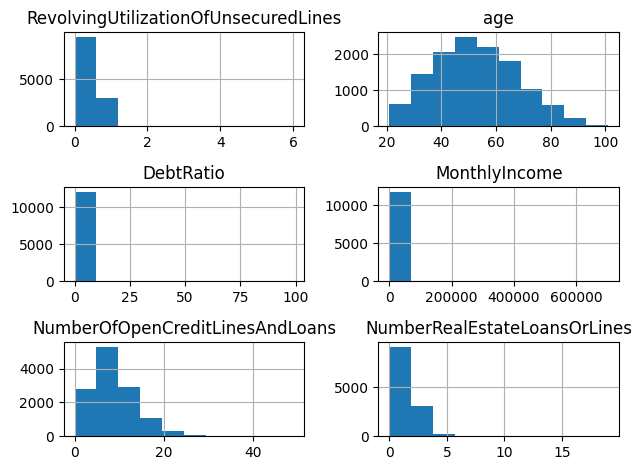

In [8]:
df.drop(columns=["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfDependents",target]).hist()
plt.tight_layout()
plt.show()

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

- Estamos ante un problema de clasificación
- La variable target es "SeriousDlqin2yrs"

### #1.3
Pinta la distribución de frecuencias del target y coméntala

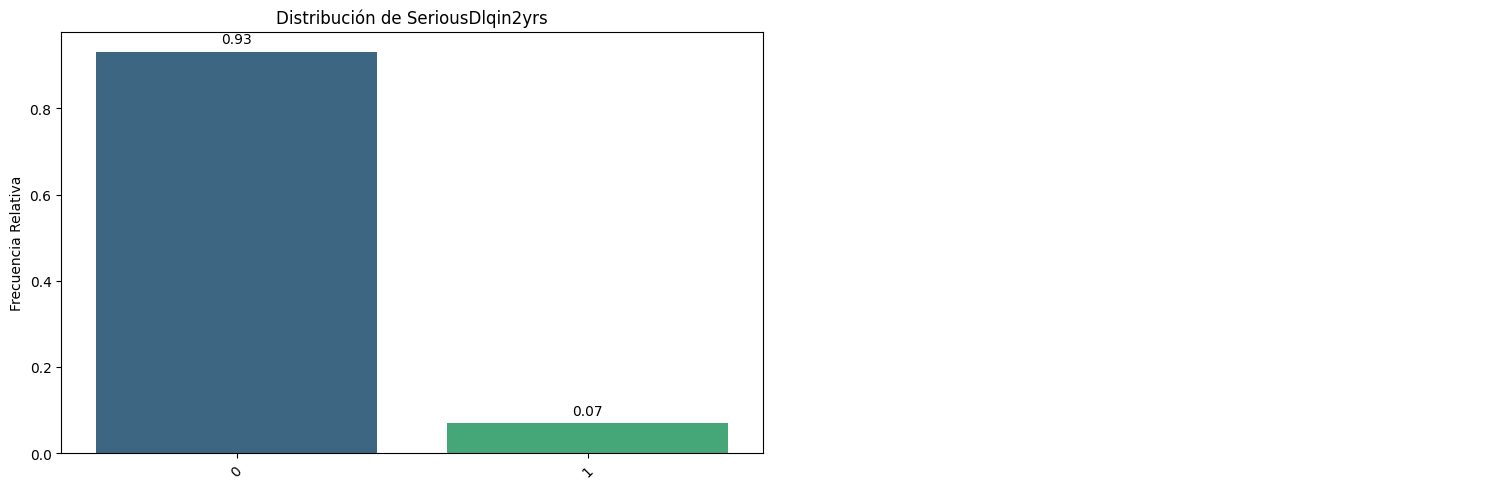

In [9]:
bvt.pinta_distribucion_categoricas(df, [target], relativa=True, mostrar_valores=True)

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

### Train - Test

In [10]:
train_set, test_set = train_test_split(df, test_size= 0.2)

### Tratamiento de NaN (Nulos)

In [11]:
df.isna().sum()

SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           721
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                      177
dtype: int64

In [12]:
# Imputo los nulos que hay en NumberOfDependents por su moda

moda_NumberOfDependents_train = train_set.NumberOfDependents.mode()[0]
train_set.NumberOfDependents = train_set.NumberOfDependents.fillna(moda_NumberOfDependents_train)
test_set.NumberOfDependents = test_set.NumberOfDependents.fillna(moda_NumberOfDependents_train)

In [13]:
# Imputo los nulos que hay en MonthlyIncome por su media

media = train_set.MonthlyIncome.mean()
train_set.MonthlyIncome = train_set.MonthlyIncome.fillna(media)
test_set.MonthlyIncome = test_set.MonthlyIncome.fillna(media)

In [14]:
num_features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines']

(6, 2)


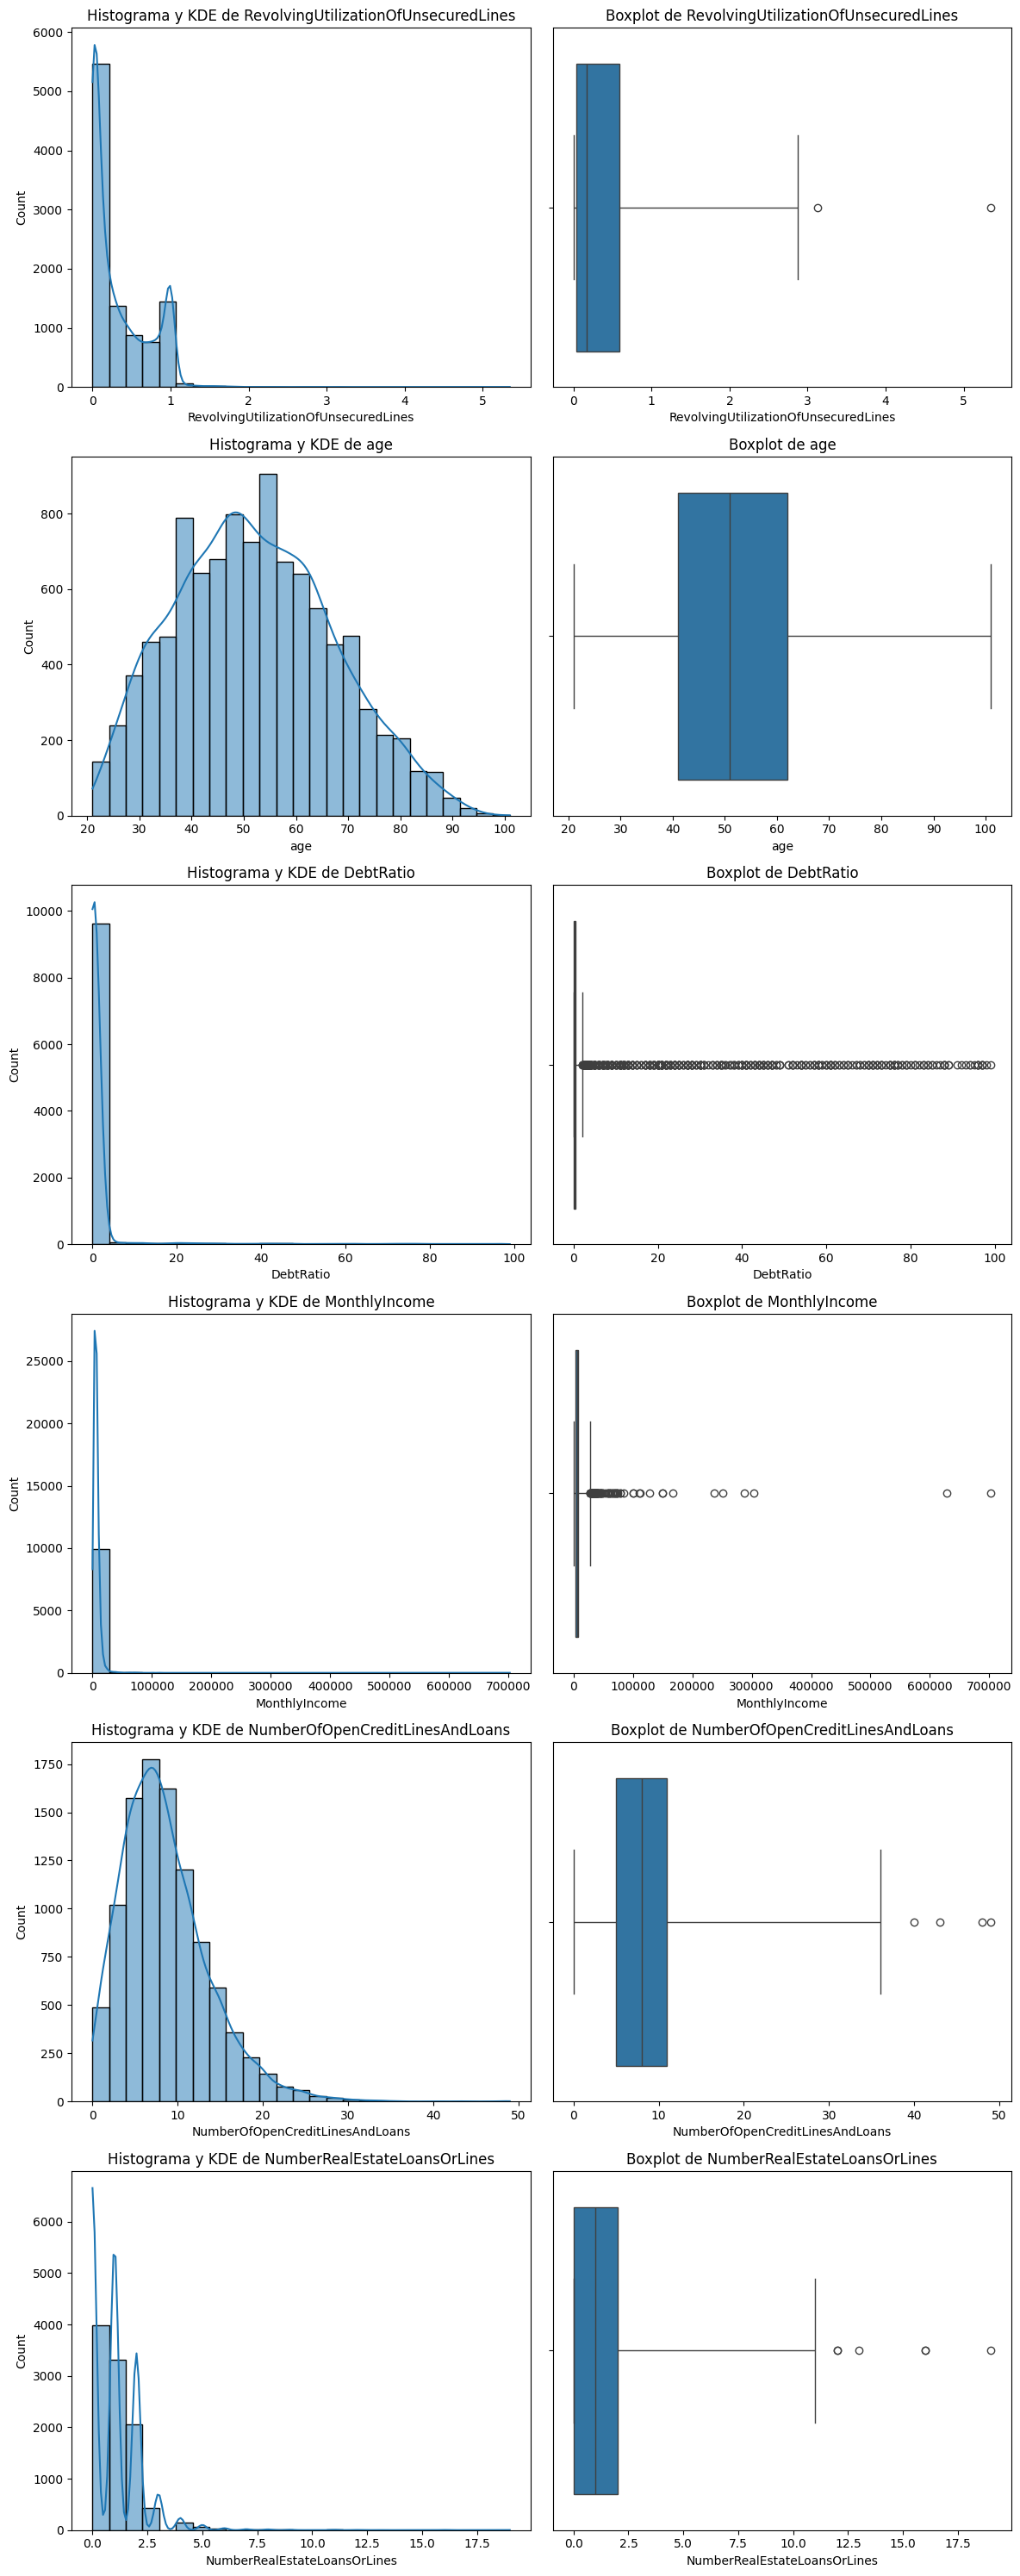

In [15]:
bvt.plot_combined_graphs(train_set, columns=num_features, bins = 25, whisker_width=4.5)

### Mini-EDA

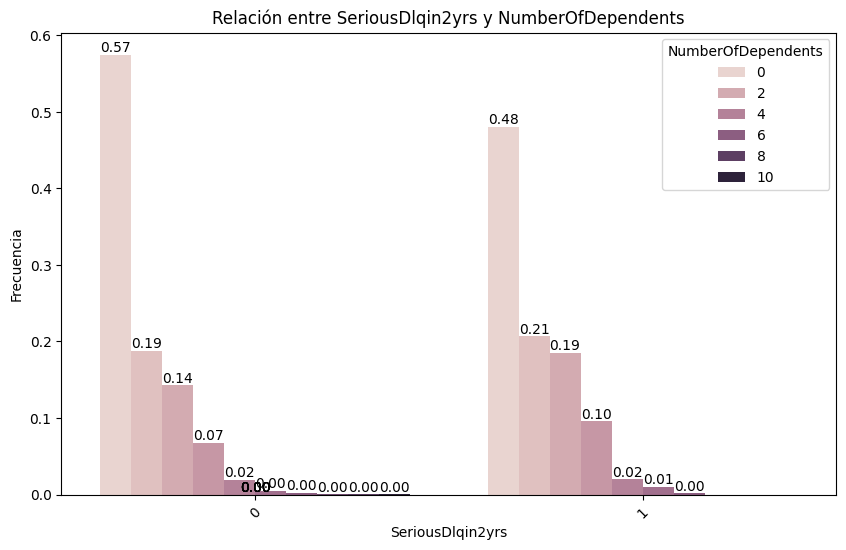

In [16]:
bvt.plot_categorical_relationship_fin(train_set, target, 'NumberOfDependents', show_values= True, relative_freq= True)

In [17]:
features = num_features + cat_features
features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

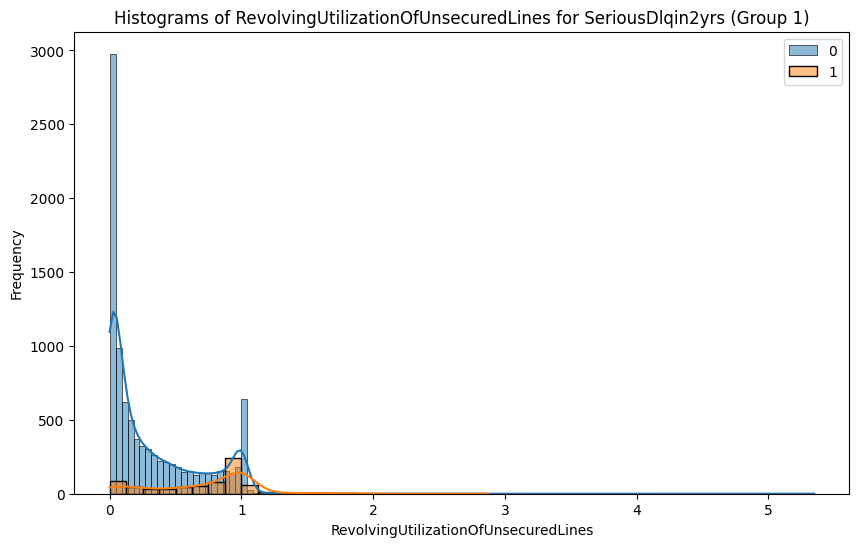

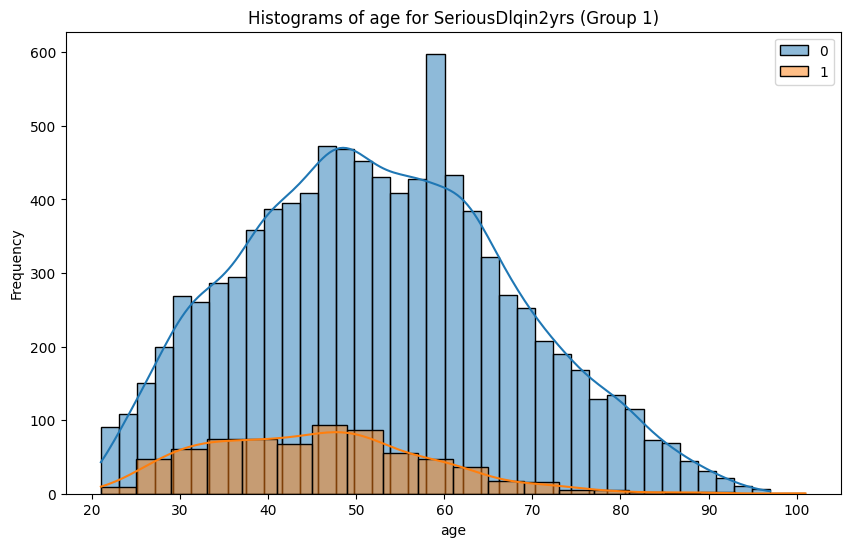

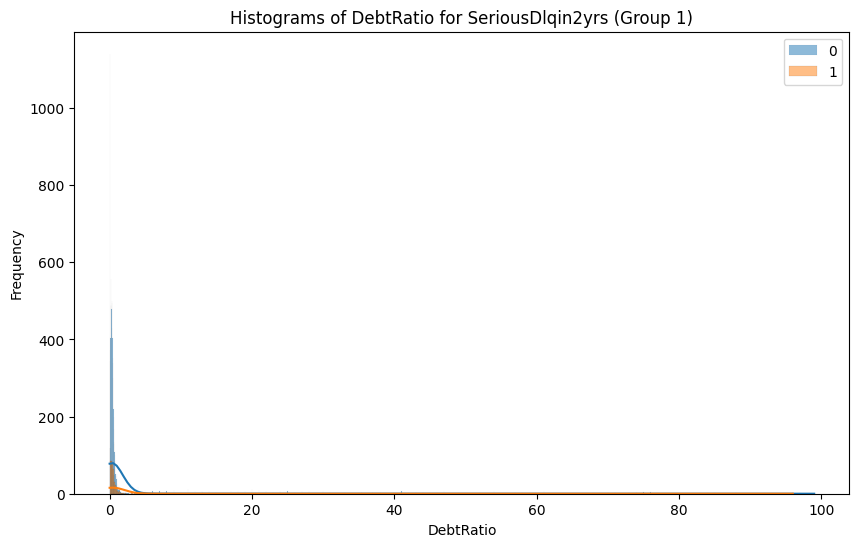

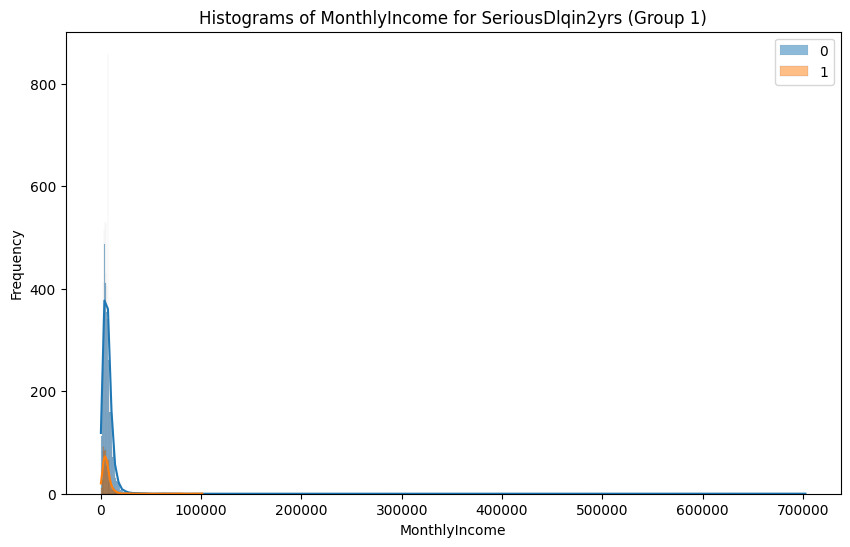

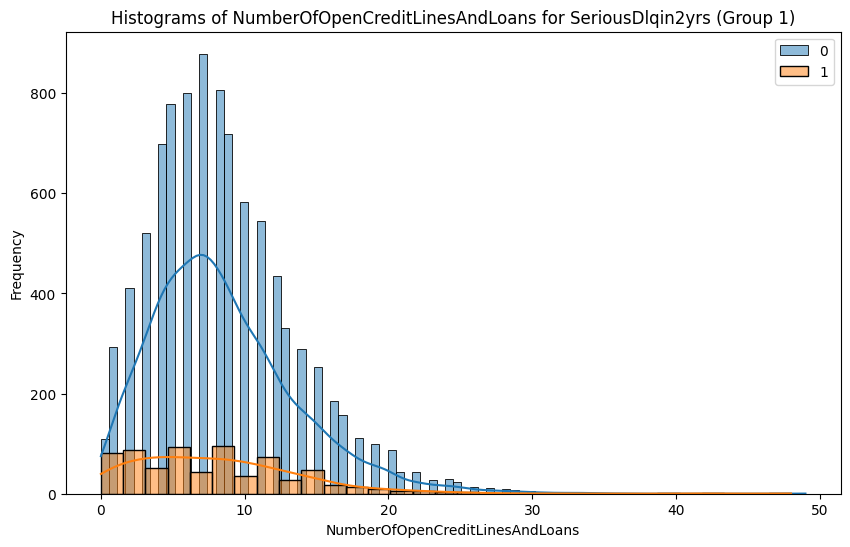

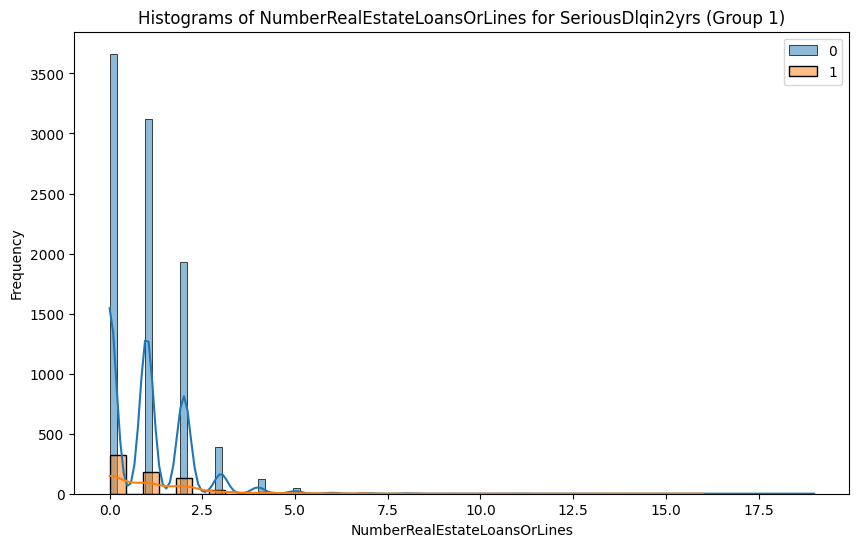

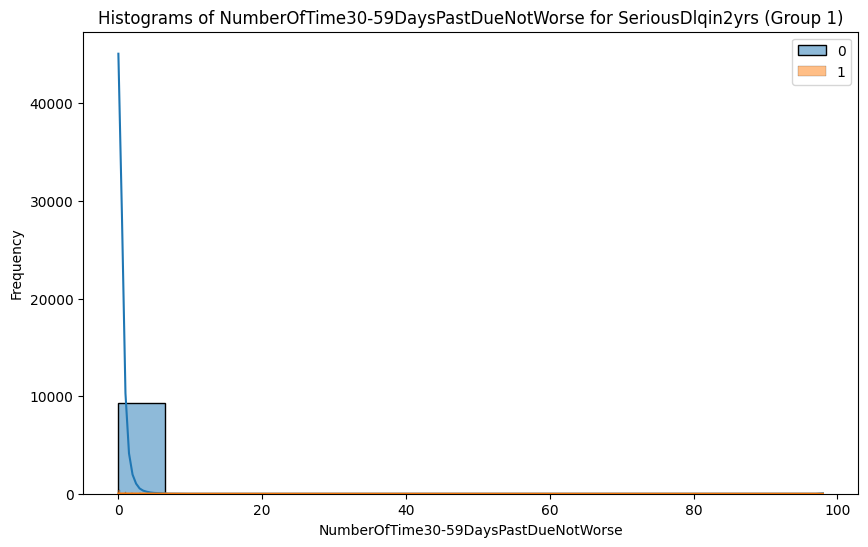

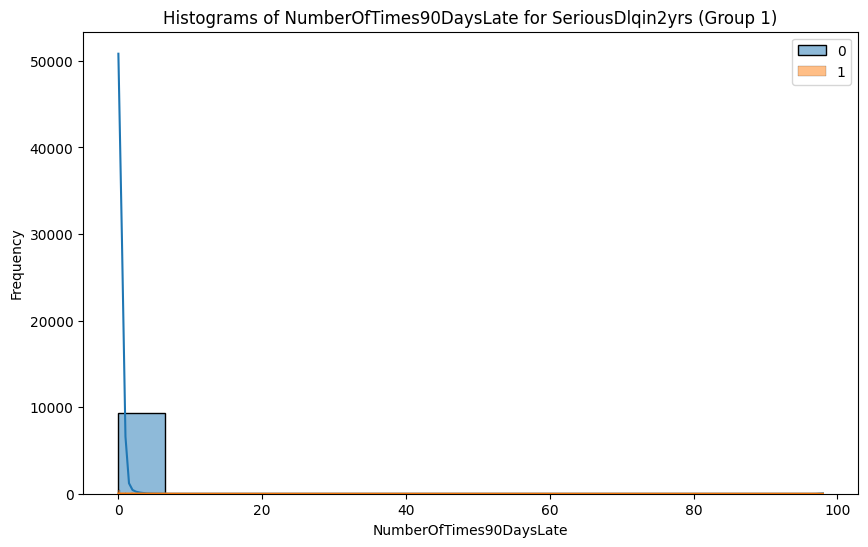

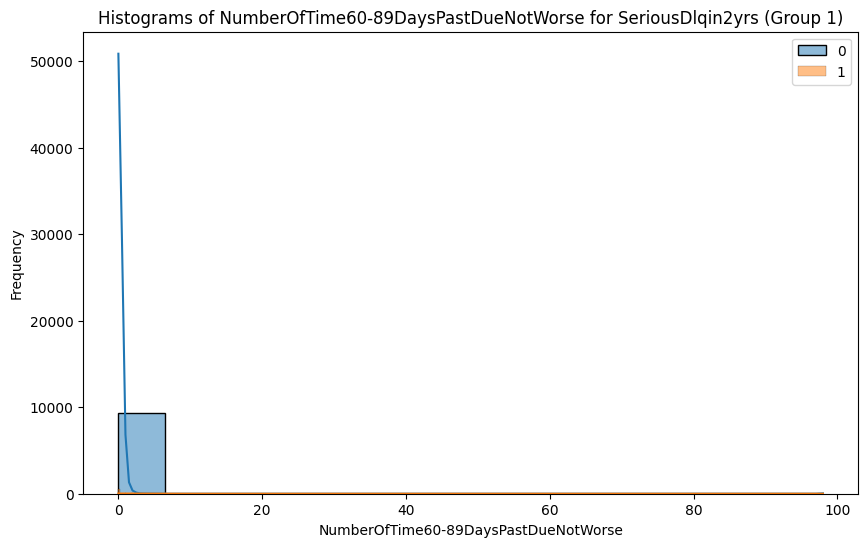

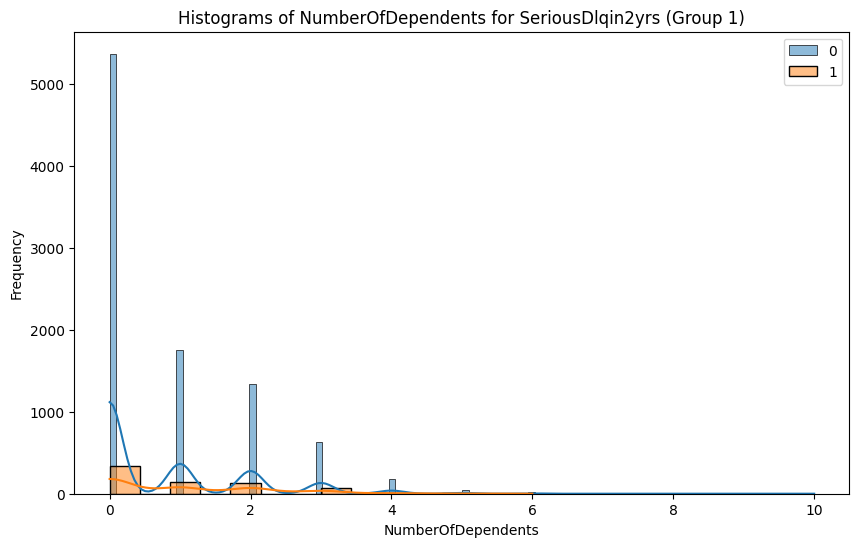

In [18]:
for col in features:
    bvt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 2)

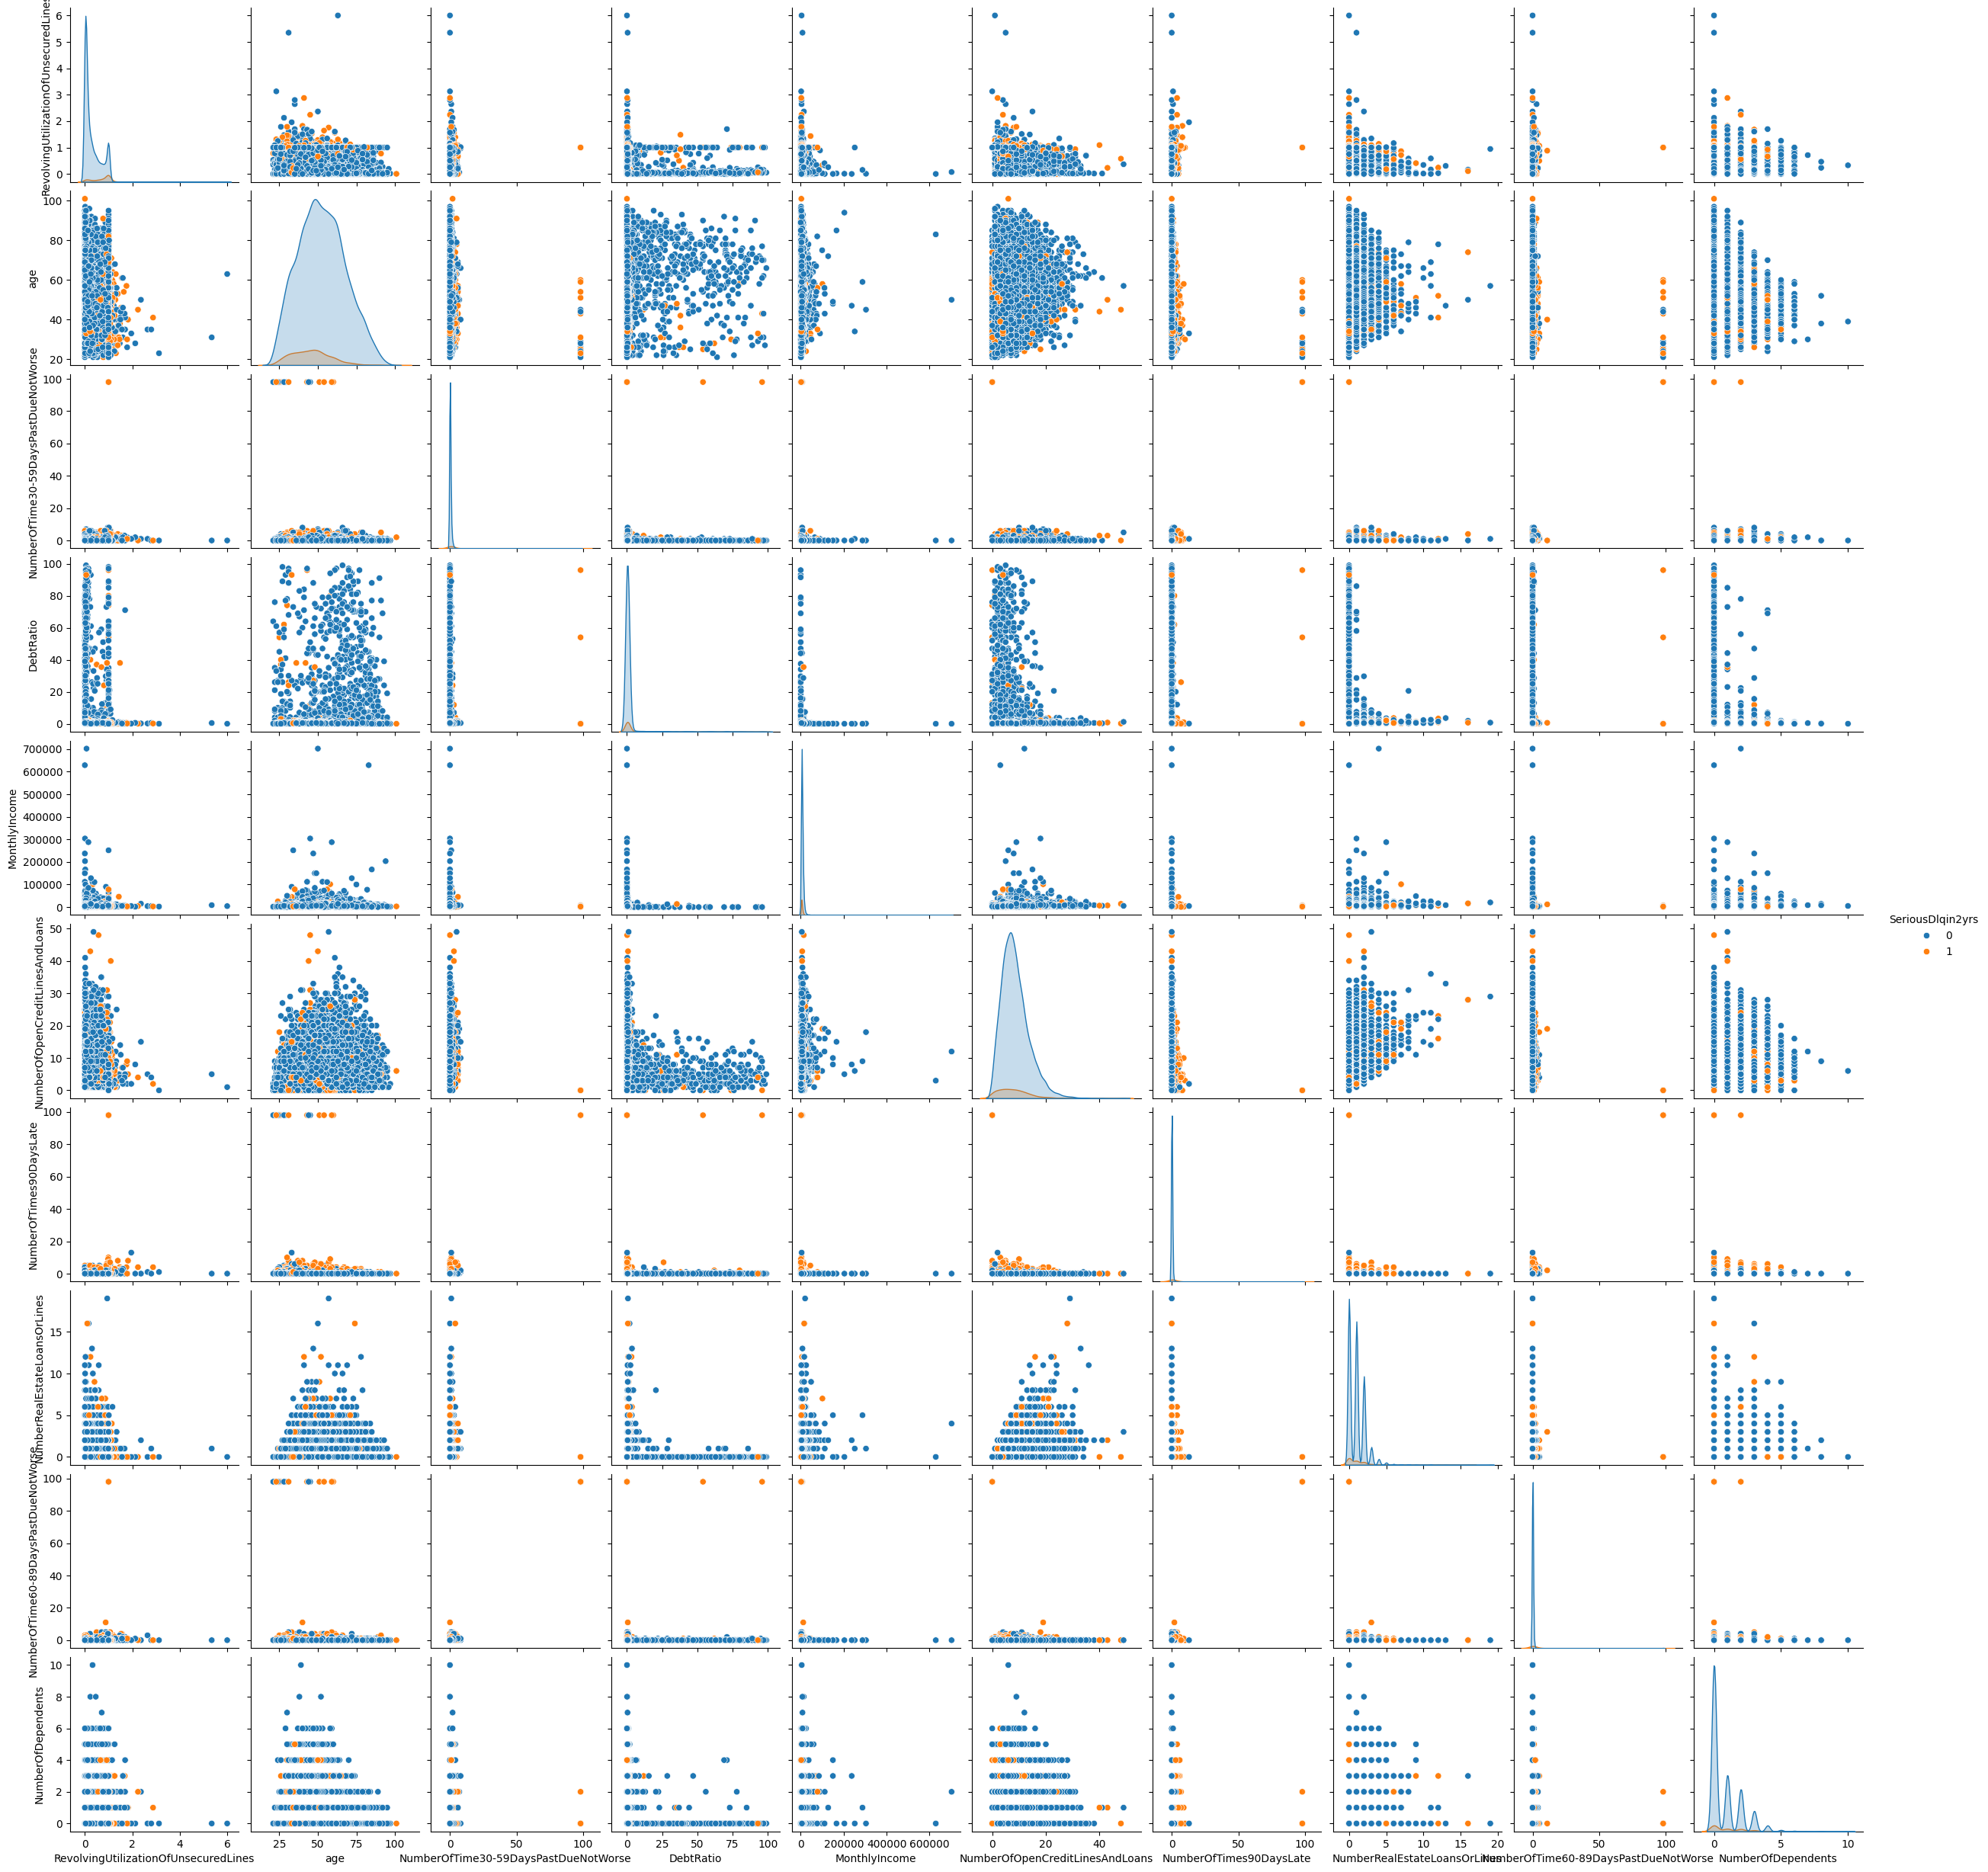

In [19]:
sns.pairplot(df, hue=target)

In [20]:
NumberOfTime_col = [col for col in train_set if col.startswith("NumberOfTime")]
NumberOfTime_col

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [21]:
features = NumberOfTime_col + ["age","MonthlyIncome"]
features

['NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'age',
 'MonthlyIncome']

In [22]:
tml.tipifica_variables(train_set[features], 8,15)

,nombre_variable,tipo_sugerido
0,NumberOfTime30-59DaysPastDueNotWorse,Numérica Discreta
1,NumberOfTimes90DaysLate,Numérica Discreta
2,NumberOfTime60-89DaysPastDueNotWorse,Numérica Discreta
3,age,Numérica Discreta
4,MonthlyIncome,Numérica Discreta


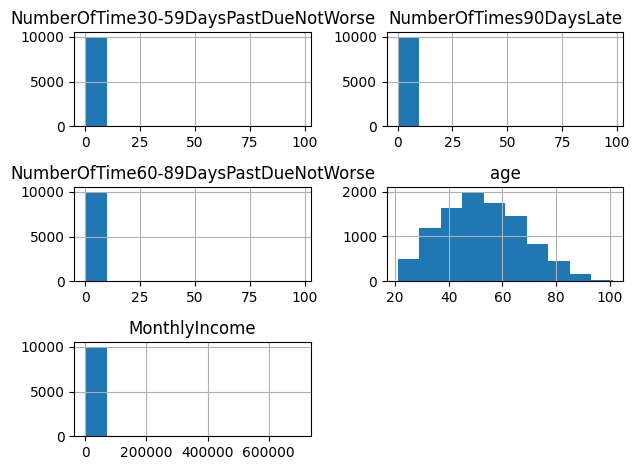

In [23]:
train_set[features].hist()
plt.tight_layout()
plt.show()

In [24]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [25]:
for col in features:
    if col != "age":
        train_set_scaled[col] = np.log1p(train_set_scaled[col]) 
        test_set_scaled[col] = np.log1p(test_set_scaled[col])

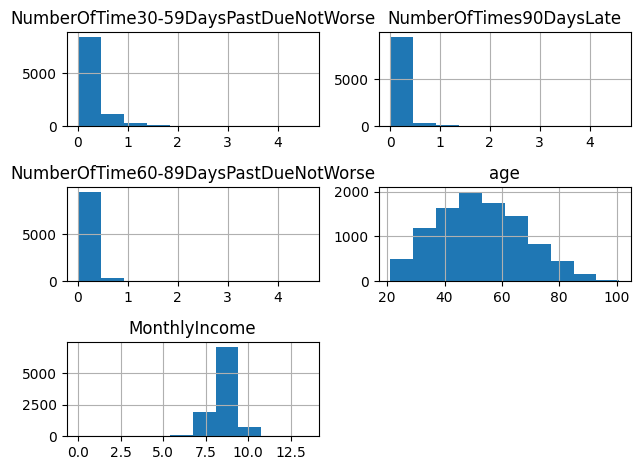

In [26]:
train_set_scaled[features].hist()
plt.tight_layout()
plt.show()

In [27]:
scaler = StandardScaler()
train_set_scaled[features] = scaler.fit_transform(train_set_scaled[features])
test_set_scaled[features] = scaler.transform(test_set_scaled[features])

In [28]:
X_train = train_set[features]
X_train_scaled = train_set_scaled[features]
y_train = train_set[target]

X_test = test_set[features]
X_test_scaled = test_set_scaled[features]
y_test = test_set[target]

### Instanciar y entrenar modelos

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      9328
           1       0.60      0.13      0.22       701

    accuracy                           0.93     10029
   macro avg       0.77      0.56      0.59     10029
weighted avg       0.91      0.93      0.91     10029



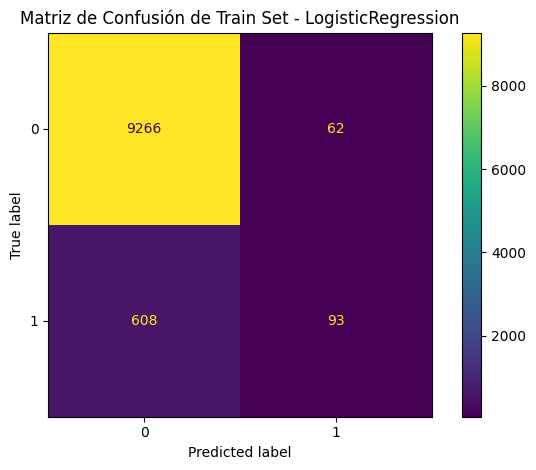

In [46]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_train_scaled)
print(classification_report(y_train, y_pred_lr))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_lr)
plt.title("Matriz de Confusión de Train Set - LogisticRegression")
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9328
           1       0.78      0.18      0.29       701

    accuracy                           0.94     10029
   macro avg       0.86      0.59      0.63     10029
weighted avg       0.93      0.94      0.92     10029



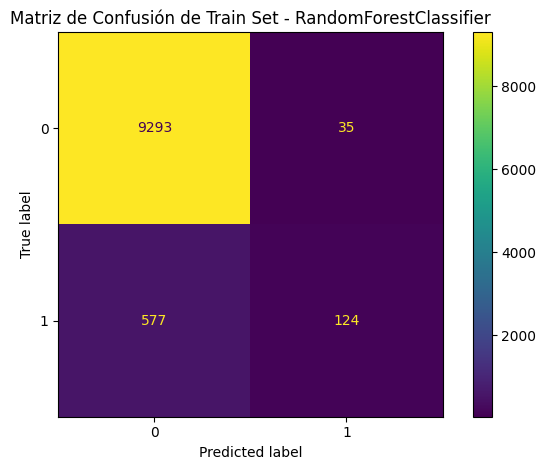

In [45]:
rnd_for = RandomForestClassifier(max_depth=5)
rnd_for.fit(X_train, y_train)

y_pred_rf = rnd_for.predict(X_train)
print(classification_report(y_train, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_rf)
plt.title("Matriz de Confusión de Train Set - RandomForestClassifier")
plt.tight_layout()
plt.show()

In [31]:
bal_acc_scores_scaler = []

for k in range(1,21):
    model = KNeighborsClassifier(n_neighbors=k)
    bal_acc = np.mean(cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='balanced_accuracy'))
    bal_acc_scores_scaler.append(bal_acc)
    print(f'Para K = {k}, recall medio: {bal_acc}')
print(f'Mejor valor de K: {(np.argmax(bal_acc_scores_scaler)) + 1}')

Para K = 1, recall medio: 0.590388493909352
Para K = 2, recall medio: 0.5492985656809821
Para K = 3, recall medio: 0.5925739021824725
Para K = 4, recall medio: 0.5541711211203435
Para K = 5, recall medio: 0.5852714412034256
Para K = 6, recall medio: 0.5627325329190688
Para K = 7, recall medio: 0.583233961885886
Para K = 8, recall medio: 0.5593478127827826
Para K = 9, recall medio: 0.5773493619077262
Para K = 10, recall medio: 0.5596694998655879
Para K = 11, recall medio: 0.575082002648134
Para K = 12, recall medio: 0.5574447333974811
Para K = 13, recall medio: 0.5705359415337063
Para K = 14, recall medio: 0.559243401681232
Para K = 15, recall medio: 0.5734468186333546
Para K = 16, recall medio: 0.5638784568868493
Para K = 17, recall medio: 0.5720234280004689
Para K = 18, recall medio: 0.5630468870590732
Para K = 19, recall medio: 0.5706433238140498
Para K = 20, recall medio: 0.5626005829199767
Mejor valor de K: 3


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      9328
           1       0.60      0.13      0.22       701

    accuracy                           0.93     10029
   macro avg       0.77      0.56      0.59     10029
weighted avg       0.91      0.93      0.91     10029



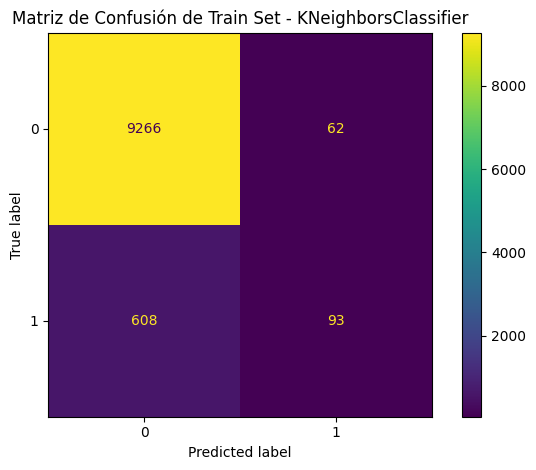

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred_knn = log_reg.predict(X_train_scaled)
print(classification_report(y_train, y_pred_knn))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_knn)
plt.title("Matriz de Confusión de Train Set - KNeighborsClassifier")
plt.tight_layout()
plt.show()

### Equilibrar

In [33]:
# SMOTE

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote_scaled, y_train_smote_scaled = smote.fit_resample(X_train_scaled, y_train)
y_train_smote_scaled.value_counts()

SeriousDlqin2yrs
0    9328
1    9328
Name: count, dtype: int64

In [34]:
print("Con SMOTE", y_train_smote.shape)
print("Sin SMOTE", y_train.shape)

Con SMOTE (18656,)
Sin SMOTE (10029,)


In [35]:
modelos = ["KNeighborsClassifier","LogisticRegression","RandomForestClassifier"]
metricas = []
model = []
for nombre,modelo in zip(modelos,[knn, log_reg, rnd_for]):
    model.append(modelo)
    print(f"Para {nombre}:", end = " ")
    if nombre not in modelos[0:2]:
        metrica = np.mean(cross_val_score(modelo, X_train_smote, y_train_smote, cv = 5, scoring = "balanced_accuracy"))
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_smote_scaled, y_train_smote_scaled, cv = 5, scoring = "balanced_accuracy"))
    print(metrica)
    metricas.append(metrica)

Para KNeighborsClassifier: 0.8440696361301001
Para LogisticRegression: 0.7421748862816766
Para RandomForestClassifier: 0.7031548609375046


In [36]:
# RandomUnderSampler

under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train, y_train)
X_train_under_scaled, y_train_under_scaled = under.fit_resample(X_train_scaled, y_train)
y_train_under.value_counts()

SeriousDlqin2yrs
0    701
1    701
Name: count, dtype: int64

In [37]:
print("Con RandomUnderSampler", y_train_under.shape)
print("Sin RandomUnderSampler", y_train.shape)

Con RandomUnderSampler (1402,)
Sin RandomUnderSampler (10029,)


In [38]:
modelos = ["KNeighborsClassifier","LogisticRegression","RandomForestClassifier"]
metricas = []
model = []
for nombre,modelo in zip(modelos,[knn, log_reg, rnd_for]):
    model.append(modelo)
    print(f"Para {nombre}:", end = " ")
    if nombre not in modelos[0:2]:
        metrica = np.mean(cross_val_score(modelo, X_train_under, y_train_under, cv = 5, scoring = "balanced_accuracy"))
    else:
        metrica = np.mean(cross_val_score(modelo, X_train_under_scaled, y_train_under_scaled, cv = 5, scoring = "balanced_accuracy"))
    print(metrica)
    metricas.append(metrica)

Para KNeighborsClassifier: 0.6897163120567374
Para LogisticRegression: 0.737563323201621
Para RandomForestClassifier: 0.7304204660587639


### Optimización de hiperparámetros

In [51]:
# Definir la grid de hiperparámetros
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],  # 'liblinear' soporta 'l1' y 'l2'
    "max_iter": [100, 200, 500],
    "class_weight": ["balanced"]
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Mejor modelo y parámetros óptimos
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

Mejores parámetros: {'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor puntuación: 0.8347796510717224


In [53]:
best_model = grid_search.best_estimator_  # Obtiene el mejor modelo
best_preds = best_model.predict(X_test_scaled)  # Predice con el mejor modelo

print('Classification Report Test_set, best params:')
print(classification_report(y_test, best_preds))

Classification Report Test_set, best params:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2345
           1       0.23      0.66      0.34       163

    accuracy                           0.83      2508
   macro avg       0.60      0.75      0.62      2508
weighted avg       0.92      0.83      0.87      2508



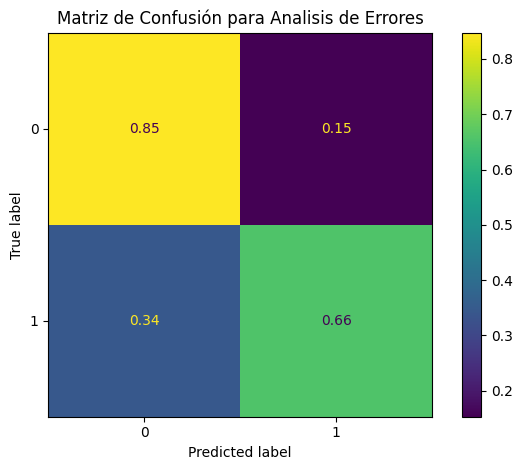

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test, best_model.predict(X_test_scaled), normalize = "true")
plt.title("Matriz de Confusión para Analisis de Errores")
plt.tight_layout()
plt.show()